In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,musteri,yas,kidem_suresi,egitim,is_durumu,meslek_grubu,tarih,target
0,23b2476c8a,44.0,46.0,5f8ca0f83b,915be3a7a4,44af6626d6,20190601,0
1,5a7e3a7122,39.0,194.0,01a4f2c96c,915be3a7a4,44af6626d6,20190601,0
2,2ec95c7499,38.0,182.0,7e6640bfe0,d36d84f51a,44af6626d6,20190601,0
3,54399dac33,34.0,101.0,5f8ca0f83b,991c4998fb,44af6626d6,20190601,0
4,97a74b2e58,41.0,125.0,7bb291e291,242927d0f5,91ed9c1e18,20190601,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   musteri       60000 non-null  object 
 1   yas           60000 non-null  float64
 2   kidem_suresi  60000 non-null  float64
 3   egitim        59697 non-null  object 
 4   is_durumu     59929 non-null  object 
 5   meslek_grubu  38670 non-null  object 
 6   tarih         60000 non-null  int64  
 7   target        60000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [4]:
# tarih değişkeninin atılması (hepsi aynı ve gerek yok)
df.drop(["tarih"], axis=1, inplace=True)

# Eksik Verilerin Doldurulması

<BarContainer object of 13 artists>

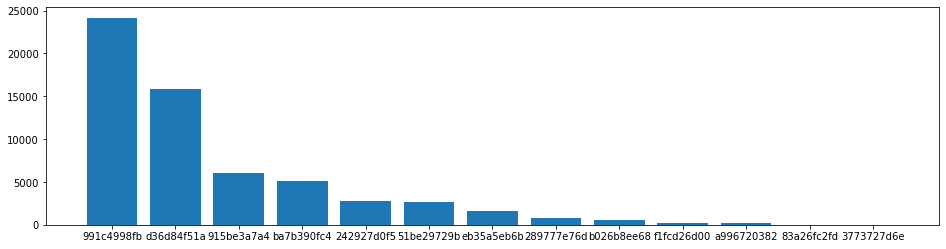

In [5]:
plt.figure(figsize=(16,4))
plt.bar(df["is_durumu"].value_counts().index, df["is_durumu"].value_counts())

In [6]:
df["is_durumu"].value_counts()

991c4998fb    24159
d36d84f51a    15820
915be3a7a4     6090
ba7b390fc4     5145
242927d0f5     2792
51be29729b     2645
eb35a5eb6b     1570
289777e76d      810
b026b8ee68      514
f1fcd26d00      197
a996720382      159
83a26fc2fd       27
3773727d6e        1
Name: is_durumu, dtype: int64

In [7]:
df["meslek_grubu"].isnull().sum()

21330

In [8]:
df.iloc[:,4:6][df.iloc[:,4:6]["meslek_grubu"].isna()]["is_durumu"].value_counts()  # hangi is durumu icin kac tane nan var

d36d84f51a    12942
915be3a7a4     3020
51be29729b     2608
eb35a5eb6b     1563
289777e76d      791
991c4998fb      201
b026b8ee68       57
ba7b390fc4       37
242927d0f5       28
f1fcd26d00        7
83a26fc2fd        4
a996720382        1
Name: is_durumu, dtype: int64

In [11]:
df.loc[df["is_durumu"] == "51be29729b", "meslek_grubu"] = df.meslek_grubu.replace(np.nan, 'etiket1')
df.loc[df["is_durumu"] == "eb35a5eb6b", "meslek_grubu"] = df.meslek_grubu.replace(np.nan, 'etiket2')
df.loc[df["is_durumu"] == "289777e76d", "meslek_grubu"] = df.meslek_grubu.replace(np.nan, 'etiket3')
df.loc[df["is_durumu"] == "d36d84f51a", "meslek_grubu"] = df.meslek_grubu.replace(np.nan, 'etiket4') 
df.loc[df["is_durumu"] == "915be3a7a4", "meslek_grubu"] = df.meslek_grubu.replace(np.nan, 'etiket5')

In [12]:
df["egitim"].fillna(df["egitim"].mode()[0], inplace=True)
df["is_durumu"].fillna(df["is_durumu"].mode()[0], inplace=True)
df["meslek_grubu"].fillna(df["meslek_grubu"].mode()[0], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   musteri       60000 non-null  object 
 1   yas           60000 non-null  float64
 2   kidem_suresi  60000 non-null  float64
 3   egitim        60000 non-null  object 
 4   is_durumu     60000 non-null  object 
 5   meslek_grubu  60000 non-null  object 
 6   target        60000 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ MB


# Aykırı Değer Tespiti

In [14]:
column_numeric = ["yas", "kidem_suresi"]

for column in column_numeric:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    under = q1 - 1.5*iqr
    over = q3 + 1.5*iqr
    outliers = df[(df[column] < under) | (df[column] > over)][column]
    values = df[(df[column] >= under) & (df[column] <= over)][column]
    
    print("in  {0}  column , number of outliers  :  {1}".format(column,(len(outliers))))
    print("in  {0}  column , the ratio of outliers to all values : {1}".format(column,(len(outliers)/len(df[column]))))
    
    print("min outlier : {}".format(min(outliers)))

in  yas  column , number of outliers  :  2215
in  yas  column , the ratio of outliers to all values : 0.03691666666666667
min outlier : 45.0
in  kidem_suresi  column , number of outliers  :  781
in  kidem_suresi  column , the ratio of outliers to all values : 0.013016666666666666
min outlier : 254.0


## Second Data

In [2]:
df2 = pd.read_csv("monthly_expenditures.csv")
df2

,musteri,sektor,islem_adedi,aylik_toplam_tutar,tarih
0,f6b1f7d2d6,DIJITAL_URUNLR,1,10.0,20190101
1,f6b1f7d2d6,EGL_SPOR_HOBI,2,520.0,20190101
2,f6b1f7d2d6,GIYIM_AKSESUAR,4,1420.0,20190101
3,f6b1f7d2d6,KUYUMCU,1,550.0,20190101
4,f6b1f7d2d6,RESTORAN_CATER,1,90.0,20190101
...,...,...,...,...,...
932139,d0042304a7,GIYIM_AKSESUAR,1,80.0,20190601
932140,338917573f,GIYIM_AKSESUAR,1,60.0,20190601
932141,bc29c57669,BENZIN_YAKIT,1,10.0,20190601
932142,0e261e9515,GIYIM_AKSESUAR,1,330.0,20190601


In [3]:
df2["tarih"] = df2["tarih"].astype(str)

In [5]:
# eksi değerleri düzeltme
for i in df2[(df2["islem_adedi"] <= 0)]["islem_adedi"].index:
    df2["islem_adedi"][i] = df2["islem_adedi"][i] *-1

In [95]:
yeni_df = df2.pivot_table(index="musteri", columns=["sektor", "tarih"], values=["islem_adedi", "aylik_toplam_tutar"])

In [96]:
yeni_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 00010d061a to ffffdfc0f2
Columns: 156 entries, ('aylik_toplam_tutar', 'BAHCE_CICEKCLK', '20190101') to ('islem_adedi', 'TURIZM_KONAKLM', '20190601')
dtypes: float64(156)
memory usage: 119.8+ MB


In [97]:
yeni_df = yeni_df.fillna(0)

In [99]:
train_df = yeni_df.loc[df["musteri"]]

In [6]:
yeni_data = pd.concat([train_df, df], axis=1)

In [7]:
yeni_data

,yas,kidem_suresi,egitim,is_durumu,meslek_grubu,target,aylik_toplam_tutar,aylik_toplam_tutar.1,aylik_toplam_tutar.2,aylik_toplam_tutar.3,...,islem_adedi.68,islem_adedi.69,islem_adedi.70,islem_adedi.71,islem_adedi.72,islem_adedi.73,islem_adedi.74,islem_adedi.75,islem_adedi.76,islem_adedi.77
23b2476c8a,44.0,46.0,5f8ca0f83b,915be3a7a4,44af6626d6,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5a7e3a7122,39.0,194.0,01a4f2c96c,915be3a7a4,44af6626d6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2ec95c7499,38.0,182.0,7e6640bfe0,d36d84f51a,44af6626d6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54399dac33,34.0,101.0,5f8ca0f83b,991c4998fb,44af6626d6,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97a74b2e58,41.0,125.0,7bb291e291,242927d0f5,91ed9c1e18,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51ec62cf3,20.0,24.0,5f8ca0f83b,51be29729b,ogrenci,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6dc2be5b51,22.0,56.0,7e6640bfe0,d36d84f51a,yenimezun,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a5e7b7632c,41.0,188.0,7e6640bfe0,ba7b390fc4,bfd9cb6270,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
f79e555824,31.0,143.0,7e6640bfe0,991c4998fb,314826bda8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_train = yeni_data.drop(["target"], axis=1)
test_test = yeni_data["target"]
train_train = pd.get_dummies(train_train, columns=(["egitim", "is_durumu", "meslek_grubu"]))

In [9]:
# ne kadar değerli:

from sklearn.ensemble import RandomForestClassifier

class_weights_dict ={0:0.52119527, 1:12.29508197} 

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=18,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=500,
                             class_weight=class_weights_dict)

rfc.fit(train_train, test_test)

RandomForestClassifier(class_weight={0: 0.52119527, 1: 12.29508197},
                       max_depth=18, max_features=12, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=500)

In [10]:
fi_rf = pd.DataFrame({'feature': train_train.columns, 'importance': rfc.feature_importances_}).sort_values(by='importance', ascending=False)
fi_rf = fi_rf.reset_index()

In [11]:
df_not_scaler = train_train[np.array(fi_rf)[:170,1]]
df_not_scaler

,yas,kidem_suresi,is_durumu_d36d84f51a,meslek_grubu_yenimezun,islem_adedi.58,aylik_toplam_tutar.58,aylik_toplam_tutar.31,aylik_toplam_tutar.35,aylik_toplam_tutar.30,aylik_toplam_tutar.34,...,aylik_toplam_tutar.43,islem_adedi.5,islem_adedi.53,islem_adedi.46,aylik_toplam_tutar.50,aylik_toplam_tutar,islem_adedi.50,islem_adedi,aylik_toplam_tutar.46,islem_adedi.52
23b2476c8a,44.0,46.0,0,0,0.0,0.0,730.0,0.0,170.0,1470.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5a7e3a7122,39.0,194.0,0,0,0.0,0.0,0.0,0.0,0.0,1660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2ec95c7499,38.0,182.0,1,0,0.0,0.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54399dac33,34.0,101.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97a74b2e58,41.0,125.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51ec62cf3,20.0,24.0,0,0,0,0,0,690,0,0,...,0,0,0,0,0,0,0,0,0,0
6dc2be5b51,22.0,56.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a5e7b7632c,41.0,188.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f79e555824,31.0,143.0,0,0,1,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_array = scaler.fit_transform(df_not_scaler)
scaler_df = pd.DataFrame(scaler_array, columns=df_not_scaler.columns, index = df_not_scaler.index)
scaler_df["target"] = yeni_data["target"]
scaler_df

,yas,kidem_suresi,is_durumu_d36d84f51a,meslek_grubu_yenimezun,islem_adedi.58,aylik_toplam_tutar.58,aylik_toplam_tutar.31,aylik_toplam_tutar.35,aylik_toplam_tutar.30,aylik_toplam_tutar.34,...,islem_adedi.5,islem_adedi.53,islem_adedi.46,aylik_toplam_tutar.50,aylik_toplam_tutar,islem_adedi.50,islem_adedi,aylik_toplam_tutar.46,islem_adedi.52,target
23b2476c8a,2.344877,-0.507981,-0.598398,-0.524426,-0.427521,-0.064212,-0.002937,-0.034108,-0.004667,-0.001253,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
5a7e3a7122,1.641521,1.800054,-0.598398,-0.524426,-0.427521,-0.064212,-0.005546,-0.034108,-0.004947,-0.000374,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
2ec95c7499,1.500849,1.612916,1.671128,-0.524426,-0.427521,-0.064212,-0.005403,-0.034108,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
54399dac33,0.938165,0.349734,-0.598398,-0.524426,-0.427521,-0.064212,-0.005546,-0.034108,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
97a74b2e58,1.922863,0.724010,-0.598398,-0.524426,-0.427521,-0.064212,-0.005546,-0.034108,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51ec62cf3,-1.031233,-0.851068,-0.598398,-0.524426,-0.427521,-0.064212,-0.005546,-0.004522,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
6dc2be5b51,-0.749890,-0.352033,1.671128,1.906848,-0.427521,-0.064212,-0.005546,-0.034108,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
a5e7b7632c,1.922863,1.706485,-0.598398,-0.524426,-0.427521,-0.064212,-0.005546,-0.034108,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0
f79e555824,0.516151,1.004717,-0.598398,-0.524426,-0.271735,-0.062837,-0.005546,-0.034108,-0.004947,-0.008048,...,-0.12673,-0.120298,-0.038909,-0.036268,-0.007215,-0.102861,-0.131123,-0.010113,-0.095893,0


In [13]:
df_yeni = scaler_df.copy()

In [14]:
# korelasyon tablosu ile değer temizlemek

# Create correlation matrix
corr_matrix = df_yeni.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
df_yeni.drop(to_drop, axis=1, inplace=True)

In [15]:
df_yeni

,yas,kidem_suresi,is_durumu_d36d84f51a,islem_adedi.58,aylik_toplam_tutar.58,aylik_toplam_tutar.31,aylik_toplam_tutar.8,aylik_toplam_tutar.7,islem_adedi.57,aylik_toplam_tutar.11,...,aylik_toplam_tutar.45,meslek_grubu_bfd9cb6270,aylik_toplam_tutar.43,islem_adedi.5,islem_adedi.53,aylik_toplam_tutar.50,islem_adedi.50,islem_adedi,islem_adedi.52,target
23b2476c8a,2.344877,-0.507981,-0.598398,-0.427521,-0.064212,-0.002937,-0.073273,-0.068300,-0.298074,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
5a7e3a7122,1.641521,1.800054,-0.598398,-0.427521,-0.064212,-0.005546,-0.073273,-0.068300,-0.298074,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
2ec95c7499,1.500849,1.612916,1.671128,-0.427521,-0.064212,-0.005403,-0.073273,-0.068300,-0.459000,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
54399dac33,0.938165,0.349734,-0.598398,-0.427521,-0.064212,-0.005546,-0.073273,-0.068300,-0.459000,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
97a74b2e58,1.922863,0.724010,-0.598398,-0.427521,-0.064212,-0.005546,-0.073273,-0.068300,-0.459000,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b51ec62cf3,-1.031233,-0.851068,-0.598398,-0.427521,-0.064212,-0.005546,0.308896,-0.028315,-0.459000,0.078319,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
6dc2be5b51,-0.749890,-0.352033,1.671128,-0.427521,-0.064212,-0.005546,-0.073273,-0.068300,-0.459000,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
a5e7b7632c,1.922863,1.706485,-0.598398,-0.427521,-0.064212,-0.005546,-0.048250,0.017383,0.023780,-0.089550,...,-0.005776,7.424771,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0
f79e555824,0.516151,1.004717,-0.598398,-0.271735,-0.062837,-0.005546,-0.073273,-0.068300,-0.459000,-0.089550,...,-0.005776,-0.134684,-0.047033,-0.12673,-0.120298,-0.036268,-0.102861,-0.131123,-0.095893,0


In [ ]:
import sklearn.linear_model as skl_lm
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",np.unique(y_train), y_train) 
print(class_weights)

In [ ]:
class_weights_dict ={0:0.52119527 , 1:10.29508197} 

In [ ]:
X_train = df_yeni.drop(["target"], axis=1)
y_train = df_yeni["target"]

In [ ]:
from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=15, 
                             min_samples_split=10,
                             max_features=8,
                             n_estimators=500,
                             class_weight=class_weights_dict)
rfc.fit(xx_train,yy_train)
print("X_train, y_train ile son train etmeyi unutma")

In [70]:
#ilk değer modelin tahmin ettiği olasılık, ikinci değer modelin tahmin ettiği etiket, 3. değer ise gerçekte sahip olduğu etiket
proba_test= rfc.predict_proba(xx_test)
proba_predict_list= [list(x) for x in list(proba_test)]
predict_max_value = [(max(proba_predict_list[x]), proba_predict_list[x].index(max(proba_predict_list[x]))) for x in
                         range(len(proba_predict_list))]


In [ ]:
target_df = pd.DataFrame({"musteri": xx_test.index})
target_df['target']=''

for i in range(len(predict_max_value)):
    
        target_df['target'][i] = predict_max_value[i][1]

print(roc_auc_score(yy_test, np.array(target_df['target'])))